# TensorFlow - Common Architectures with Keras API

---



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from mlxtend.plotting import plot_decision_regions

## Keras object oriented API
The Keras API also allows to build neural networks with common architectures.
1. We can **build a feedforward** neural network using `tf.keras.Sequential`
2. We can **create the variables** in two ways:
   * Late variable creation, specifying the `input shape` in the `build` method (best practice)
   * Instant variable creation, specifying the `input shape` when creating the layer

In [2]:
model = tf.keras.Sequential()

# Late variable creation (best practice)
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))

model.build(input_shape=(None, 4))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  80        
_________________________________________________________________
dense_1 (Dense)              multiple                  544       
Total params: 624
Trainable params: 624
Non-trainable params: 0
_________________________________________________________________


In [0]:
model = tf.keras.Sequential()

# Instant variable creation
model.add(tf.keras.layers.Dense(units=16, activation='relu', input_shape=(4, )))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))

3. We can **access the variables**, using `model.variables`

In [4]:
for v in model.variables:
  print('{:20s}'.format(v.name), v.trainable, v.shape)

dense_2/kernel:0     True (4, 16)
dense_2/bias:0       True (16,)
dense_3/kernel:0     True (16, 32)
dense_3/bias:0       True (32,)


4. We can **configure the layers** when we create them by specifying the:
   * Activation functions, using `tf.keras.activations`
   * Variable initializers, using `tf.keras.initializers`
   * Regularization methods, using `tf.keras.regularizers`

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=16, 
                                activation=tf.keras.activations.relu, 
                                kernel_initializer=tf.keras.initializers.glorot_uniform(),
                                bias_initializer=tf.keras.initializers.Constant(2.0)))
model.add(tf.keras.layers.Dense(units=32,
                                activation=tf.keras.activations.sigmoid,
                                kernel_regularizer=tf.keras.regularizers.l1))

5. We can **configure the model** when we compile it by specifying the:
   * Optimizer, using `tf.keras.optimizers`
   * Loss function for training, using `tf.keras.losses`
   * Metrics to use for reporting the performance on the training, validation and test datasets, using `tf.keras.metrics`

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))

model.build(input_shape=(None, 4))

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.Accuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), ])

6. We can **train the model**, using the `fit` method
7. We can **access the history** of the loss function and the metrics to evaluate training and validation performance, using `history`.

The following subsection shows how to implement points 6 and 7.

### Example of Keras object oriented API
To illustrate Keras's object oriented API, we solve a **XOR classification task**, which is a classic problem for analyzing the capacity of a model to capture the non-linear decision boundary between two classes.

* To do so, we generate a toy dataset of 200 training samples with two features $(x^0, x^1) \sim U[-1, 1)$. 
* Then we assign the class label for sample $i$ according to the following rule:
$$y_i = \begin{cases} 
		    0 & \text{if } x_i^0 x_i^1 < 0 \\
	      0 & \text{otherwise}
        \end{cases}$$
* Finally, we use half of the data for training and half for validation.

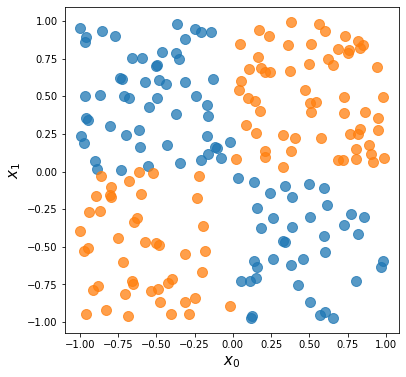

In [7]:
tf.random.set_seed(seed=1)
np.random.seed(seed=1)

# Generating the features
x = np.random.uniform(low=-1, high=1, size=(200, 2))

# Generating the class labels  
y = np.ones(len(x))
y[x[:, 0] * x[:, 1] < 0] = 0

# Splitting into training and validation datasets
x_train = x[:100, :]
y_train = y[:100]
x_valid = x[100:, :]
y_valid = y[100:]

# Plotting the dataset
fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0], x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0], x[y==1, 1], 'o', alpha=0.75, markersize=10)
plt.xlabel('$x_0$', size=15)
plt.ylabel('$x_1$', size=15)
plt.show()


Now we need to decide what architecture we should choose for the given task and dataset. As a general rule of thumb, the more layers we have and the more neurons we have in each layer, the larger the capacity of the model (how readily the model can approximate complex functions) will be. While having more parameters means the network can fit more complex functions, larger models are usually harder to train and prone to overfitting. In practice, it is always a good idea to start with a simple model as a baseline. 

1. We **build a logistic regression** model, using `tf.keras.Sequential` 
2. We **create the variables**, specifying the `input shape` in the `build` method

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model.build(input_shape=(None, 2))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              multiple                  3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


3. We **configure the model** when we compile it, using `tf.keras.optimizers`, `tf.keras.losses`, `tf.keras.metrics`

In [0]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

4. We **train the model** for 200 epochs with a batch size of 2, using the `fit` method

In [0]:
hist = model.fit(x_train, y_train,
                 validation_data=(x_valid, y_valid),
                 epochs=200, batch_size=2, verbose=0)

5. We **access the history** of training epochs using `hist.history` and plot the learning curves, including the training and validation loss, and their accuracies.

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


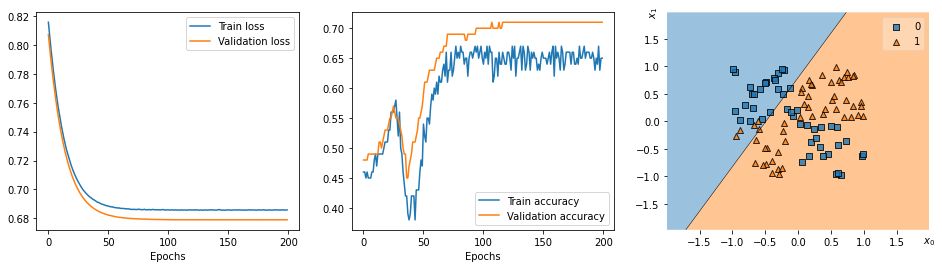

In [12]:
history = hist.history

fig = plt.figure(figsize=(16, 4))

ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['Train loss', 'Validation loss'])
ax.set_xlabel('Epochs')

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'])
plt.plot(history['val_binary_accuracy'])
plt.legend(['Train accuracy', 'Validation accuracy'])
ax.set_xlabel('Epochs')

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer), clf=model)
ax.set_xlabel('$x_0$')
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel('$x_1$')
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

As you can see, a simple model with no hidden layer can only derive a linear decision bounday, which is unable to solve the XOR problem. As a consequence, the loss terms for both the training and the validation datasets are very high, and the classification accuracy is very low.

To derive a non linear decision bounday, we can add one or more hidden layers connected via non linear activation functions. The universal approximation theorem states that a feedforward neural network with a single hidden layer and a relatively large number of hidden units can approximate arbitrary continuous functions relatively well. Therefore, one approach to tackle the XOR problem is to add a hidden layer and compare different numbers of hidden units, until we observe satisfactory results on the validation dataset. This means increasing the width of the model. Alternatively, we can add more hidden layers, which means increasing the depth of the model. The advantage of making the model deeper rather than wider is that fewer parameters are required to achieve a comparable model capacity. However, a downside of deep (versus wide) models is that they are prone to vanishing and exploding gradients, which make them harder to train. 

1. We **build a model with three hidden layers**, using `tf.keras.Sequential`
2. We **create the variables** using the `build` method.

In [13]:
tf.random.set_seed(seed=1)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model.build(input_shape=(None, 2))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              multiple                  12        
_________________________________________________________________
dense_10 (Dense)             multiple                  20        
_________________________________________________________________
dense_11 (Dense)             multiple                  20        
_________________________________________________________________
dense_12 (Dense)             multiple                  5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


3. We **configure the model** when we compile it, using `tf.keras.optimizers`, `tf.keras.losses`, `tf.keras.metrics`

In [0]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

4. We **train the model** for 200 epochs with a batch size of 2, using the `fit` method

In [0]:
hist = model.fit(x_train, y_train,
                 validation_data=(x_valid, y_valid),
                 epochs=200, batch_size=2, verbose=0)

5. We **access the history** of training epochs using `hist.history` and plot the learning curves, including the training and validation loss, and their accuracies.

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


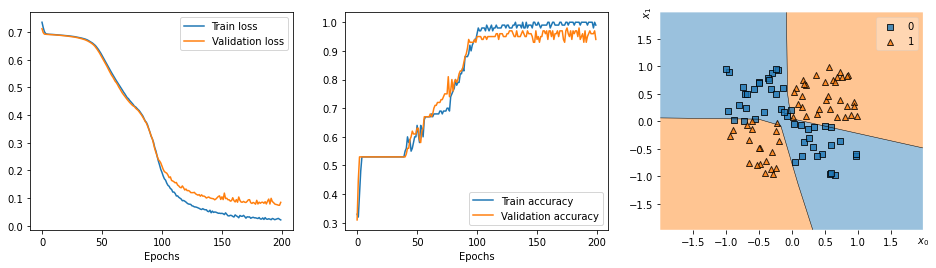

In [16]:
history = hist.history

fig = plt.figure(figsize=(16, 4))

ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['Train loss', 'Validation loss'])
ax.set_xlabel('Epochs')

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'])
plt.plot(history['val_binary_accuracy'])
plt.legend(['Train accuracy', 'Validation accuracy'])
ax.set_xlabel('Epochs')

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer), clf=model)
ax.set_xlabel('$x_0$')
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel('$x_1$')
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

# Keras functional API
In the previous example, we used the `Sequential` class to create a fully connected neural network with multiple layers. However, this does not allow to create more complex models with multiple input, output or intermediate branches. This is where Keras's functional API comes in.

### Example of Keras object oriented API
To illustrate the usage of the functional API, we implement the same architecture built using the object oriented approach (`Sequential`) in the previous section; however, this time we will use the functional approach. 

In this approach, we first specify the **input layer**. Then, we construct the **hidden layers**, with their outputs named `h1`, `h2`, `h3`. For this problem, we use the output of each layer as the input to the succedent layer (note that if you are building more complex models with multiple branches, this may not be the case, but is can still be done via the functional API). Finally, we specify the **output layer** as the final dense layer that receives `h3` as input.

In [17]:
tf.random.set_seed(1)

# Input layer
inputs = tf.keras.Input(shape=(2,))

# Hidden layers
h1 = tf.keras.layers.Dense(units=4, activation='relu')(inputs)
h2 = tf.keras.layers.Dense(units=4, activation='relu')(h1)
h3 = tf.keras.layers.Dense(units=4, activation='relu')(h2)

# Output layer
outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(h3)

# Construct the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


We **configure the model** when we compile it, using `tf.keras.optimizers`, `tf.keras.losses`, `tf.keras.metrics`

In [0]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

We **train the model** for 200 epochs with a batch size of 2, using the `fit` method

In [0]:
hist = model.fit(x_train, y_train,
                 validation_data=(x_valid, y_valid),
                 epochs=200, batch_size=2, verbose=0)